In [53]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/surendarbaskaran/Airline_passengers_prediction/refs/heads/main/airline-passengers.csv")
data['Month'] = pd.to_datetime(data['Month'])  # Ensure datetime format
data.set_index('Month', inplace=True)
print(data.head())
print(data.info())
print(data.isnull().sum())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
Passengers    0
dtype: int64


In [27]:
# test - train split 
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

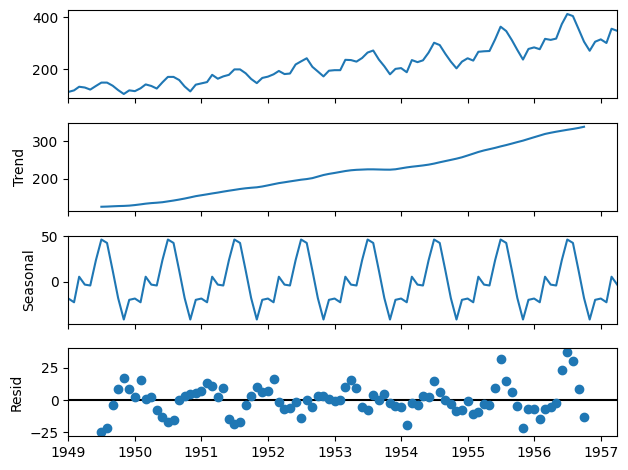

Month
1949-01-01   -18.773003
1949-02-01   -22.880146
1949-03-01     5.286520
1949-04-01    -3.415861
1949-05-01    -4.380146
                ...    
1956-12-01   -20.201575
1957-01-01   -18.773003
1957-02-01   -22.880146
1957-03-01     5.286520
1957-04-01    -3.415861
Name: seasonal, Length: 100, dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train, model='additive',period=12)
decomposition.plot()
plt.show()
# df["Passengers"].plot(title='passenger prediction', figsize=(12, 6))
# plt.show()
# print(decomposition.seasonal)


In [29]:
from pmdarima import auto_arima
model = auto_arima(train, seasonal=True, trace=True,m=12)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.761, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.16 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.34 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.28 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.70 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                            Sat, 28 Dec 2024   AIC                            644.203
Time:                                    08:27:54   BIC                            651.601
Sample:                                01-01-1949   HQIC                           647.182
                                     - 04-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.97   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
forecast=model.predict(test.shape[0])
forecast.head()

1957-05-01    353.433649
1957-06-01    406.781321
1957-07-01    447.984392
1957-08-01    438.051605
1957-09-01    391.246543
Freq: MS, dtype: float64

In [33]:
test.head()

,Passengers
Month,
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404


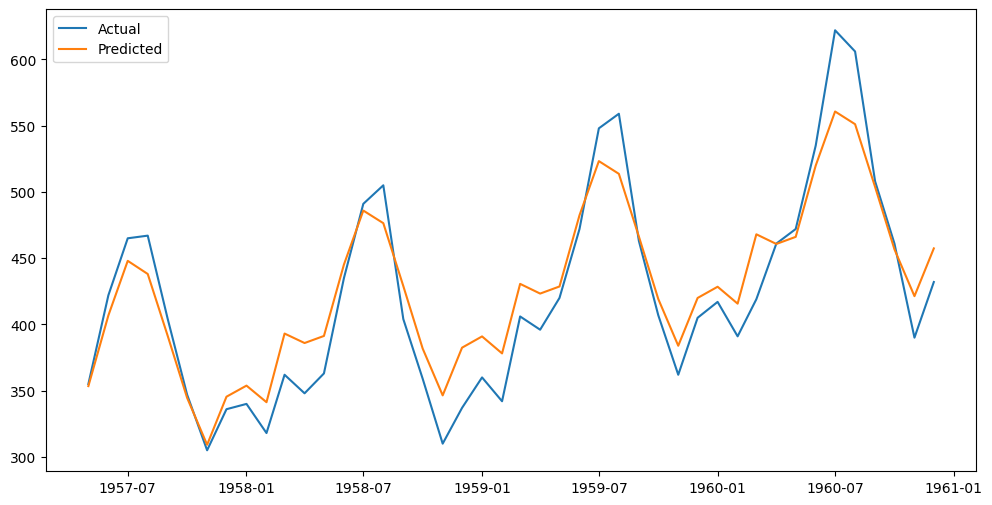

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(test["Passengers"], label='Actual')
plt.plot(forecast, label='Predicted')
plt.legend()
plt.show()

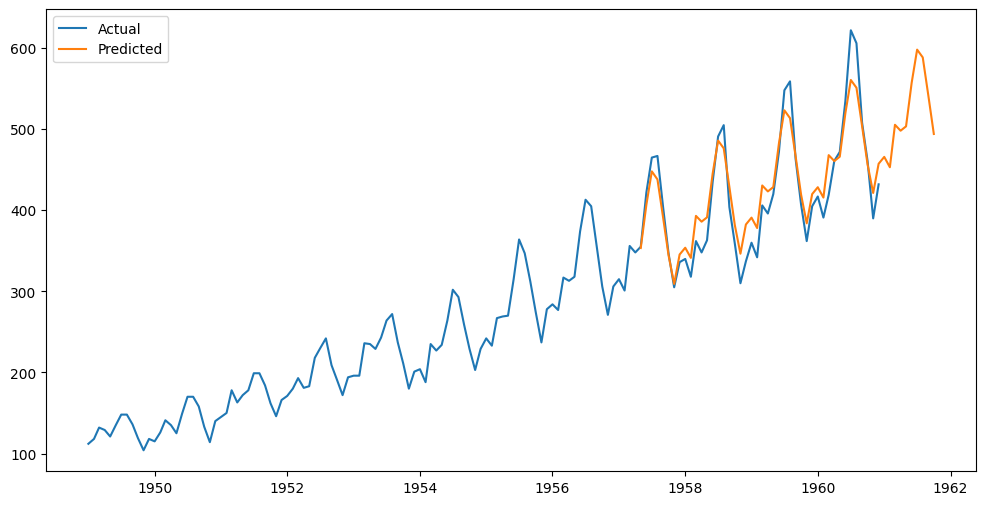

In [41]:
n=10 #no of month needs to be predict after 1961-jan
forecast1=model.predict(44+n)
plt.figure(figsize=(12, 6))
plt.plot(data["Passengers"], label='Actual')
plt.plot(forecast1, label='Predicted')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f'RMSE: {rmse}')

RMSE: 26.205870286696356


In [47]:
std_close = test['Passengers'].std()
std_close_forecast = forecast.std()
print(f'Standard Deviation of dataset: {std_close}, forcasted :{std_close_forecast}')

Standard Deviation of dataset: 77.3302785932846, forcasted :59.013014329562516
